# ИНТРО

![population_subset](images/population_subset.png)
![population_subset_2](images/population_subset_2.png)
![population_subset_3](images/population_subset_3.png)

***
# СТАТ ГИПОТЕЗА

![stat_h](images/stat_h.png)
![stat_h_2](images/stat_h_2.png)
![stat_h_3](images/stat_h_3.png)
![stat_h_4](images/stat_h_4.png)
![stat_h_5](images/stat_h_5.png)

***
# СТАТ ЗНАЧИМОСТЬ

![errors](images/errors.png)
![errors_2](images/errors_2.png)


## СТАТ ЗНАЧИМОСТЬ: P-VALUE

![p_val](images/p_val.png)
![p_val_2](images/p_val_2.png)
![p_val_3](images/p_val_3.png)
![p_val_6](images/p_val_6.png)
![alpha](images/alpha.png)
![alpha_2](images/alpha_2.png)
![alpha_3](images/alpha_3.png)
![alpha_4](images/alpha_4.png)

***
# СТАТ ТЕСТЫ

![tests](images/tests.png)
![tests_2](images/tests_2.png)
![tests_3](images/tests_3.png)
![tests_4](images/tests_4.png)
![tests_5](images/tests_5.png)

## ПРОВЕРКА НА НОРМАЛЬНОСТЬ

![normal_distro](images/normal_distro.png)
![normal_distro_2](images/normal_distro_2.png)

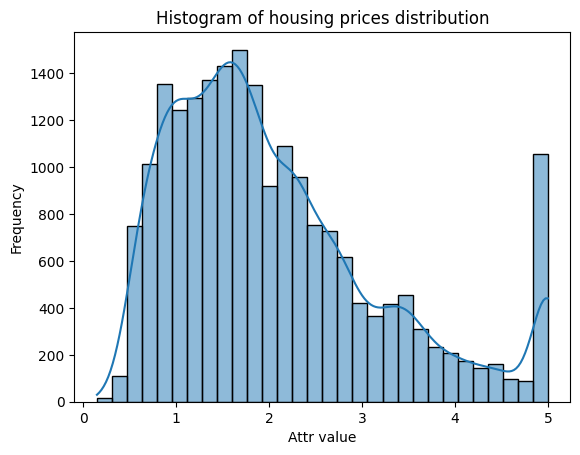

In [6]:
# import libs
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# load data
dataset = datasets.fetch_california_housing()
data = dataset.target

# set hist params
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Attr value', ylabel='Frequency')
plt.title('Histogram of housing prices distribution')

plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

![qq](images/qq.png)

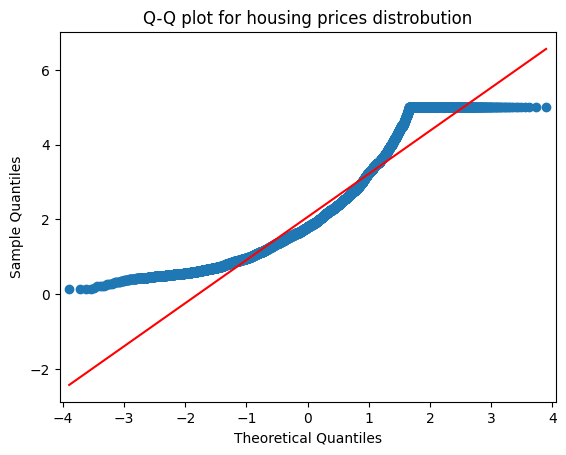

In [7]:
import statsmodels.api as sm

sm.qqplot(data, line='s')
plt.title('Q-Q plot for housing prices distrobution')

plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. Например, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также гистограмма и Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

![shapiro](images/shapiro.png)

In [8]:
import scipy.stats as stats

# set significance value
alpha = 0.05

# load data
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# test
_, p = stats.shapiro(data)
print('p-value = %.3f' % (p))

# interpret
if p <= alpha:
    print('Distribution abnormal')
else:
    print('Distribution normal')

p-value = 0.015
Distribution abnormal


Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. 

С помощью теста Шапиро — Уилка определите, распределены ли значения нормально.

In [9]:
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]
_, p = stats.shapiro(data)
print(round(p, 2))

if p <= alpha:
    print('Distribution abnormal')
else:
    print('Distribution normal')

0.41
Distribution normal


## ПАРАМЕТРИЧЕСКИЕ ТЕСТЫ


### ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

![t-test](images/t-test.png)
![t-test_2](images/t-test_2.png)

In [10]:
# set significance level
alpha = 0.05

# load data
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# test, popmean is expected mean
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')
print('p-value = {:.3f}'.format(p))

# interpret
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

![t-test_3](images/t-test_3.png)
![t-test_4](images/t-test_4.png)

In [11]:
import numpy as np

alpha = 0.05

data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# Levene test to check for variance equality
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# Test for group means
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


![t-test_5](images/t_test-5.png)

### ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

![anova](images/anova.png)
![anova_2](images/anova_2.png)

In [12]:
alpha = 0.05

group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# test for variance equality
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# interpret p-value for variance equality
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')
    
# test for means equality
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)
print('p-value = {:.3f}'.format(p))

# interpret p-value for means equality
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))



Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### ПАРНЫЙ T-КРИТЕРИЙ

![t_test-6](images/t-test_6.png)
![t_test-7](images/t-test_7.png)

In [13]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

![anova_3](images/anova_3.png)
![anova_4](images/anova_4.png)

In [16]:
from statsmodels.stats.anova import AnovaRM

alpha = 0.05

data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})

print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



![anova_5](images/anova_5.png)
![param_tests_summary](images/param_tests_summary.png)

***
Компания оптимизировала доставку товаров и хочет узнать, стало ли среднее время доставки меньше 40 минут. 

In [19]:
alpha = 0.05
data = data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print(round(p, 3))

0.018


Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном.

In [20]:
alpha = 0.05
data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

_, p = stats.f_oneway(data_north, data_south, data_east)

print(round(p, 3))

0.0


Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. 

In [22]:
alpha = 0.05

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]
data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

_, p = stats.ttest_rel(data_after, data_before, alternative='less')

print(round(p, 3))

0.213


***
## НЕПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

![non_param_tests](images/non_param_tests.png)
![sign_test](images/sign_test.png)
![sign_test_2](images/sign_test_2.png)

In [23]:
from statsmodels.stats.descriptivestats import sign_test

alpha = 0.05

data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

_, p = sign_test(data, mu0=60)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### U-КРИТЕРИЙ МАННА-УИТНИ

![u_test](images/u_test.png)
![u_test_2](images/u_test_2.png)

In [24]:
alpha = 0.05 

data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

_, p = stats.mannwhitneyu(data_chat_bot, data_operator)
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### КРИТЕРИЙ УИЛКОКСОНА

![wilcinson](images/wilcinson.png)
![wilcinson_2](images/wilcinson_2.png)

In [25]:
alpha = 0.05 

data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative='less')
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА

![kruskal](images/kruskal.png)
![kruskal_2](images/kruskal_2.png)

In [26]:
alpha = 0.05

data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

_, p = stats.kruskal(data_basic, data_silver, data_gold)
print('p-value: {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### КРИТЕРИЙ ФРИДМАНА

![friedman](images/friedman.png)

In [27]:
alpha = 0.05

data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)
print('p-value: {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


![all_tests_summary](images/all_tests_summary.png)

***
Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок.

In [30]:
alpha = 0.05
data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

_, p = stats.wilcoxon(data_after, data_before, alternative='greater')
print(round(p, 3))

0.742


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно 75.

In [31]:
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]
_, p = sign_test(data, 75)
print(round(p, 3))

0.136


Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям «Тарифы», «Спецпредложения», «Техподдержка». 

In [32]:
data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

_, p = stats.kruskal(data_tariffs, data_offers, data_support)
print(round(p, 3))

0.0


***
## СТАТИСТИЧЕСКИЕ ТЕСТЫ ДЛЯ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

![cat_tests](images/cat_tests.png)
![chi](images/chi.png)
![chi_2](images/chi_2.png)
![chi_3](images/chi_3.png)

In [34]:
import pandas as pd

alpha = 0.05

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# calculating cross tables
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

_, p, _, _ = stats.chi2_contingency(table)
print('p-value: {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Примечание. К хи-квадрат тестам также относятся тесты на гомогенность (goodness of fit) и тест для дисперсий. [Более подробное описание этих тестов.](https://dtf.ru/gamedev/1270463-semeistvo-testov-hi-kvadrat-chto-u-nih-pod-kapotom-i-kakie-vybrat-dlya-sravneniya-voronok)

### КРИТЕРИЙ МАК-НЕМАРА

![mcnemar](images/mcnemar.png)

In [36]:
from statsmodels.stats.contingency_tables import mcnemar

alpha = 0.05

data = pd.read_csv('data/cat_variables_usage.csv')

table = pd.crosstab(data['До'], data['После'])

res = mcnemar(table)
p = res.pvalue
print('p-value: {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value: 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


![cat_tests_2](images/cat_tests_2.png)
![cat_tests_3](images/cat_tests_3.png)

***
Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем — новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие — как 'Нет'. 

In [37]:
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])

alpha = 0.05
table = pd.crosstab(data['Старая форма'], data['Новая форма'])

display(table)

Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8


In [38]:
res = mcnemar(table)
p = res.pvalue
print(round(p, 3))

0.035
